# Speech Phoneme Analysis and Classification

#### Francesca Maria Mizzi - 118201L
#### B.Sc in IT (Honours) (Artificial Intelligence)
#### ICS2203 - Natural Language Processing: Methods and Tools

The assigned task consisted of two parts:
 1. Feature Extraction
 2. Classifier
 
The product of the first task can be found in the csv file "rawdata.csv" which holds the below data of 150 different speakers pronouncing my chosen 3 words **heed, had, heard**:

 1. SpeakerLabel - the name of the speaker
 2. Gender - the gender of the speaker (F = Female, M = Male)
 3. Word - the word spoken (heed, had or heard)
 4. VowelPhoneme - the vowel phoneme for the word according to ARPABET notation (IY, AE, ER)
 5. ClassNo - the number assigned to each vowel phoneme (1 = IY, 2 = AE, 3 = ER)
 6. Time - the timestamp where the formant values were extracted from (seconds)
 7. Formant1 - the frequency of the first formant in Hz
 8. Formant2 - the frequency of the second formant in Hz
 9. Formant3 - the frequency of the third formant in Hz
 
The 5 different accents I chose to use are:
 1. brm_001
 2. eyk_001
 3. lan_001
 4. roi_001
 5. sse_001

From each of the 5 chosen accents, 10 speakers were selected, 5 female and 5 female, resulting in a total 150 rows.

The 3 formants for each speaker were found using "Praat", a free application which allowed me to choose a specific section of the wav file and find the formants of each vowel, averaging the output for a 

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import neighbors
from sklearn import metrics
import numpy as np
import itertools

## Importing Dataset

In [54]:
dataset = pd.read_csv("rawdata.csv")
dataset = dataset.drop(['SpeakerLabel'], axis = 1)
dataset = dataset.drop(['Gender'], axis = 1)
dataset = dataset.drop(['Word'], axis = 1)
dataset = dataset.drop(['ClassNo'], axis = 1)
dataset = dataset.drop(['Time'], axis = 1)
print(dataset)

data_matrix = dataset.drop(['VowelPhoneme'], axis = 1)
data_labels = dataset['VowelPhoneme']

    VowelPhoneme     Formant1     Formant2     Formant3
0             IY   444.623659  2809.593757  3389.504115
1             AE  1000.117362  1785.756909  2933.149666
2             ER   718.361613  1985.049514  3149.517110
3             IY   593.824486  2738.706465  3328.840620
4             AE   986.417708  1805.294539  3080.968468
..           ...          ...          ...          ...
145           AE   972.530188  1606.190042  2666.531726
146           ER   585.249896  1669.221268  2612.789513
147           IY   319.691652  2357.731836  2820.143564
148           AE   796.434301  1538.121814  3139.960398
149           ER   499.570359  1534.045916  3047.250635

[150 rows x 4 columns]


## Splitting Dataset

In [92]:
def new_dataset():
    data_matrix = dataset.drop(['VowelPhoneme'], axis = 1)
    data_labels = dataset['VowelPhoneme']
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, data_labels, test_size=0.25, shuffle=True)
    return x_train, x_test, y_train, y_test

In [146]:
def perform_model(model, data_train, label_train, data_test, label_test, class_labels, cm_normalize=True, print_cm=True, cm_map=plt.cm.Greens):
    # to store results at various phases
    results = dict()
    
    # time at which model starts training
    print('Training KNN model..')
    model.fit(data_train, label_train)
    
    # predict test data
    print('Predicting test data...')
    y_pred = model.predict(data_test)
    test_end_time = datetime.now()
    results['predicted'] = y_pred
    
    
    # confusion matrix
    print('Generating confusion matrix...')
    cm = metrics.confusion_matrix(label_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('-----------------------')
        print('CONFUSION MATRIX')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap=cm_map)
    plt.show()
    
    # calculate overall accuracty of the model
    print('Calculating accuracy...')
    accuracy = metrics.accuracy_score(y_true=label_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('-----------------------')
    print('ACCURACY')
    print('\n      {}\n\n'.format(accuracy))
    
    
    # add the trained model to the results
    results['model'] = model
    
    return results

In [147]:
def confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap='RdPu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [148]:
def new_trial(n):
    data_train, data_test, label_train, label_test = new_dataset()
    knn_params = {'n_neighbors':[n], 'weights': ['uniform','distance'], 'algorithm': ['ball_tree', 'kd_tree','brute']}
    labels = ['IY', 'AE', 'ER']
    knn_kernel = neighbors.KNeighborsClassifier()
    knn_grid = GridSearchCV(knn_kernel, param_grid=knn_params, n_jobs=-1, verbose=1)
    knn_grid_results = perform_model(knn_grid, data_train, label_train, data_test, label_test,class_labels=labels)

Training KNN model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Predicting test data...
Generating confusion matrix...
-----------------------
CONFUSION MATRIX

 [[ 6  1  0]
 [ 1 17  0]
 [ 0  0 13]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


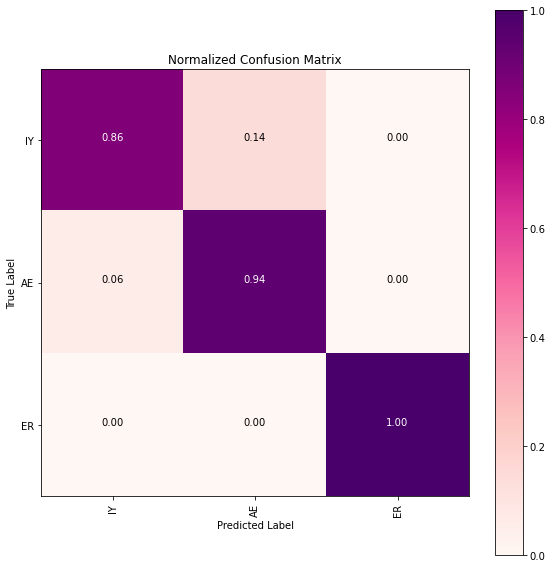

Calculating accuracy...
-----------------------
ACCURACY

      0.9473684210526315




In [149]:
new_trial(5)